<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Ensemble-Learning/Boosting/Adaboost/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaboost
AdaBoost (Adaptive Boosting) is a machine learning algorithm that combines multiple weak classifiers to create a strong, accurate predictive model


**Weak learners**

AdaBoost uses weak learners, which are classifiers that are only slightly correlated to the true classifier.

**Stumps**

AdaBoost uses stumps, which are decision trees consisting of a root node and leaf nodes.

**Weighting vector**

AdaBoost adjusts a weighting vector in each round of training to focus on examples that were misclassified in previous rounds.

**Sample weights**

The new sample weight is equal to the old sample weight multiplied by Euler's number, raised to plus or minus alpha.

**Alpha**

Alpha is positive when the predicted and the actual output agree, and negative when the predicted output does not agree with the actual class


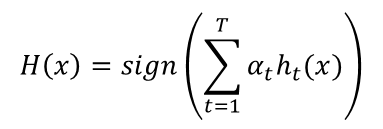

Alpha_t = weight applied to classifier
h_t = output of weak classifier

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [ ]:
data = pd.DataFrame()

In [ ]:
data['X1'] = [1,2,3,4,5,6,6,7,9,9]
data['X2'] = [5,4,6,7,3,7,2,8,9,1]
data['label'] = [1,1,0,1,0,1,0,0,0,1]
data

,X1,X2,label
0,1,5,1
1,2,4,1
2,3,6,0
3,4,7,1
4,5,3,0
5,6,7,1
6,6,2,0
7,7,8,0
8,9,9,0
9,9,1,1


<Axes: xlabel='X1', ylabel='X2'>

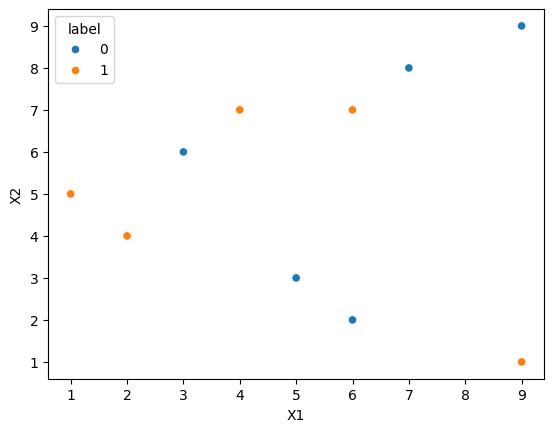

In [ ]:
import seaborn as sns
sns.scatterplot(data=data, x=data['X1'], y=data['X2'], hue=data['label'])

In [ ]:
# assign weight
data['weights'] = 1/data.shape[0]
data

,X1,X2,label,weights
0,1,5,1,0.1
1,2,4,1,0.1
2,3,6,0,0.1
3,4,7,1,0.1
4,5,3,0,0.1
5,6,7,1,0.1
6,6,2,0,0.1
7,7,8,0,0.1
8,9,9,0,0.1
9,9,1,1,0.1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1) # depth=1 because in adaboos we use decision stumps

In [ ]:
#X = data.iloc[:,0:2].values
#y = data.iloc[:,2].values
X = data[['X1','X2']].values
y = data['label'].values
X

array([[1, 5],
       [2, 4],
       [3, 6],
       [4, 7],
       [5, 3],
       [6, 7],
       [6, 2],
       [7, 8],
       [9, 9],
       [9, 1]])

In [ ]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

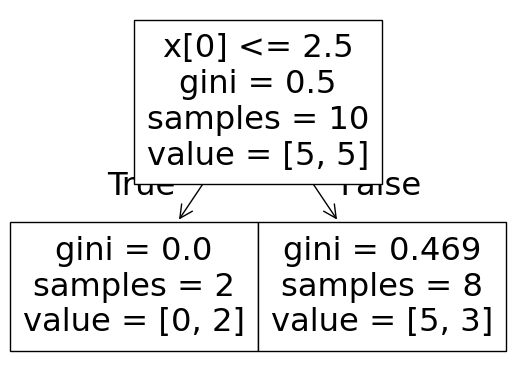

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

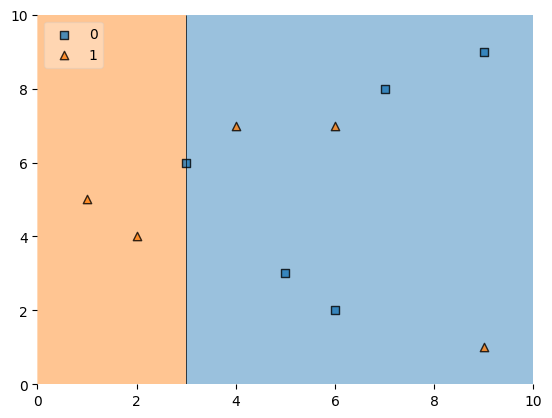

In [ ]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [ ]:
data['y_pred'] = dt1.predict(X)
data

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,4,1,0.1,1
2,3,6,0,0.1,0
3,4,7,1,0.1,0
4,5,3,0,0.1,0
5,6,7,1,0.1,0
6,6,2,0,0.1,0
7,7,8,0,0.1,0
8,9,9,0,0.1,0
9,9,1,1,0.1,0


## calculate error
If there is one incorrect output in our dataset, thus our total error is 1/5, and the alpha (performance of the stump)

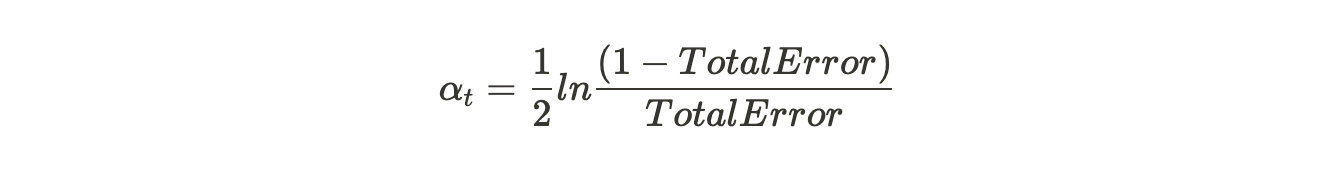

In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [ ]:
# calculate model weight
alpha1 = calculate_model_weight(0.3)  # 0.3 = total error of model
alpha1

0.42364893019360184

## update weight
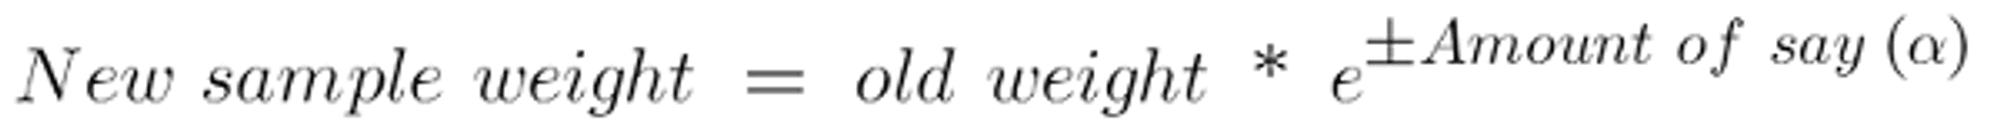

correctly classied = -alpha

misclassified = +aplha

In [ ]:
def update_row_weights(row, alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else :
    return row['weights'] * np.exp(alpha)

In [ ]:
data['updated_weights'] = data.apply(update_row_weights, axis=1)

In [ ]:
data

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,4,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,7,1,0.1,0,0.152653
4,5,3,0,0.1,0,0.065508
5,6,7,1,0.1,0,0.152653
6,6,2,0,0.1,0,0.065508
7,7,8,0,0.1,0,0.065508
8,9,9,0,0.1,0,0.065508
9,9,1,1,0.1,0,0.152653


In [ ]:
data['updated_weights'].sum()

0.9165153319682013

## normalization
because the sum of all the rows not 1


In [ ]:
data['normalized_weights'] = data['updated_weights'] / data['updated_weights'].sum()

In [ ]:
data

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,4,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,7,1,0.1,0,0.152653,0.166559
4,5,3,0,0.1,0,0.065508,0.071475
5,6,7,1,0.1,0,0.152653,0.166559
6,6,2,0,0.1,0,0.065508,0.071475
7,7,8,0,0.1,0,0.065508,0.071475
8,9,9,0,0.1,0,0.065508,0.071475
9,9,1,1,0.1,0,0.152653,0.166559


In [ ]:
data['normalized_weights'].sum()


1.0

## create range

In [ ]:
data['cumsum_upper'] = np.cumsum(data['normalized_weights'])

In [ ]:
data['cumsum_lower'] = data['cumsum_upper'] - data['normalized_weights']

In [ ]:
data

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cusum_upper,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000,0.071475
1,2,4,1,0.1,1,0.065508,0.071475,0.142950,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950,0.214425
3,4,7,1,0.1,0,0.152653,0.166559,0.380983,0.214425,0.380983
4,5,3,0,0.1,0,0.065508,0.071475,0.452458,0.380983,0.452458
5,6,7,1,0.1,0,0.152653,0.166559,0.619017,0.452458,0.619017
6,6,2,0,0.1,0,0.065508,0.071475,0.690492,0.619017,0.690492
7,7,8,0,0.1,0,0.065508,0.071475,0.761967,0.690492,0.761967
8,9,9,0,0.1,0,0.065508,0.071475,0.833441,0.761967,0.833441
9,9,1,1,0.1,0,0.152653,0.166559,1.000000,0.833441,1.000000


In [ ]:
def create_new_datasets(data):
  indices = []

  for i in range(data.shape[0]):
    a = np.random.random()
    for index, row in data.iterrows():
      if row['cumsum_upper'] > a  and a > row['cumsum_lower']:
        indices.append(index)
  return indices


In [ ]:
index_values = create_new_datasets(data)
index_values

[4, 5, 1, 6, 9, 0, 3, 5, 8, 9]

In [ ]:
second_data = data.iloc[index_values,[0,1,2,3]]
second_data

,X1,X2,label,weights
4,5,3,0,0.1
5,6,7,1,0.1
1,2,4,1,0.1
6,6,2,0,0.1
9,9,1,1,0.1
0,1,5,1,0.1
3,4,7,1,0.1
5,6,7,1,0.1
8,9,9,0,0.1
9,9,1,1,0.1


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [ ]:
X = second_data.iloc[:,0:2].values
y = second_data.iloc[:,2].values

In [ ]:
dt2.fit(X,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

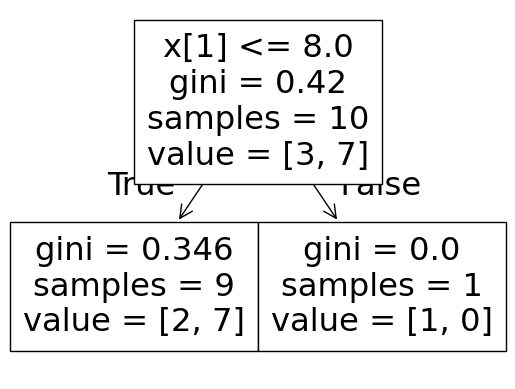

In [ ]:
plot_tree(dt2)


<Axes: >

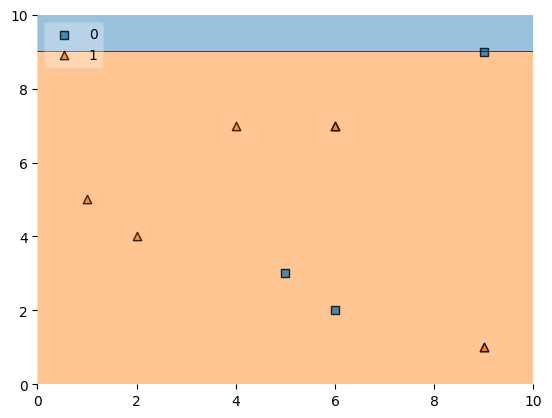

In [ ]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [ ]:
second_data['y_pred'] = dt2.predict(X)
second_data

,X1,X2,label,weights,y_pred
4,5,3,0,0.1,1
5,6,7,1,0.1,1
1,2,4,1,0.1,1
6,6,2,0,0.1,1
9,9,1,1,0.1,1
0,1,5,1,0.1,1
3,4,7,1,0.1,1
5,6,7,1,0.1,1
8,9,9,0,0.1,0
9,9,1,1,0.1,1


In [ ]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [ ]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
second_data['updated_weights'] = second_data.apply(update_row_weights,axis=1)
second_data

,X1,X2,label,weights,y_pred,updated_weights
4,5,3,0,0.1,1,0.297427
5,6,7,1,0.1,1,0.033622
1,2,4,1,0.1,1,0.033622
6,6,2,0,0.1,1,0.297427
9,9,1,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
3,4,7,1,0.1,1,0.033622
5,6,7,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
9,9,1,1,0.1,1,0.033622


In [ ]:
second_data['nomalized_weights'] = second_data['updated_weights']/second_data['updated_weights'].sum()
second_data

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,3,0,0.1,1,0.297427,0.344313
5,6,7,1,0.1,1,0.033622,0.038922
1,2,4,1,0.1,1,0.033622,0.038922
6,6,2,0,0.1,1,0.297427,0.344313
9,9,1,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
3,4,7,1,0.1,1,0.033622,0.038922
5,6,7,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
9,9,1,1,0.1,1,0.033622,0.038922


In [ ]:
second_data['nomalized_weights'].sum()


0.9999999999999999

In [ ]:
second_data['cumsum_upper'] = np.cumsum(second_data['nomalized_weights'])


In [ ]:
second_data['cumsum_lower'] = second_data['cumsum_upper'] - second_data['nomalized_weights']


In [ ]:
second_data[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,3,0,0.1,1,0.344313,0.000000,0.344313
5,6,7,1,0.1,1,0.038922,0.344313,0.383235
1,2,4,1,0.1,1,0.038922,0.383235,0.422157
6,6,2,0,0.1,1,0.344313,0.422157,0.766470
9,9,1,1,0.1,1,0.038922,0.766470,0.805392
0,1,5,1,0.1,1,0.038922,0.805392,0.844313
3,4,7,1,0.1,1,0.038922,0.844313,0.883235
5,6,7,1,0.1,1,0.038922,0.883235,0.922157
8,9,9,0,0.1,0,0.038922,0.922157,0.961078
9,9,1,1,0.1,1,0.038922,0.961078,1.000000


In [ ]:
index_values = create_new_datasets(second_data)


In [ ]:
third_data = second_data.iloc[index_values,[0,1,2,3]]
third_data

,X1,X2,label,weights
9,9,1,1,0.1
3,4,7,1,0.1
9,9,1,1,0.1
9,9,1,1,0.1
3,4,7,1,0.1
9,9,1,1,0.1
9,9,1,1,0.1
3,4,7,1,0.1
3,4,7,1,0.1
3,4,7,1,0.1


In [ ]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_data.iloc[:,0:2].values
y = second_data.iloc[:,2].values
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

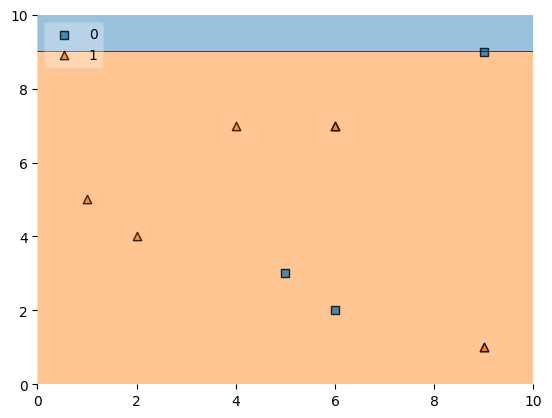

In [ ]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [ ]:
third_data['y_pred'] = dt3.predict(X)
third_data

,X1,X2,label,weights,y_pred
9,9,1,1,0.1,1
3,4,7,1,0.1,1
9,9,1,1,0.1,1
9,9,1,1,0.1,1
3,4,7,1,0.1,1
9,9,1,1,0.1,1
9,9,1,1,0.1,1
3,4,7,1,0.1,1
3,4,7,1,0.1,0
3,4,7,1,0.1,1


In [ ]:
alpha3 = calculate_model_weight(0.7)
alpha3


-0.4236489301936017

In [ ]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


##Prediction


In [ ]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [ ]:
dt2.predict(query)


array([1])

In [ ]:
dt3.predict(query)


array([1])

In [ ]:
alpha1*1 + alpha2*(1) + alpha3*(1)


1.09861228866811

In [ ]:
np.sign(1.09)


1.0

In [ ]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [ ]:
dt2.predict(query)


array([0])

In [ ]:
dt3.predict(query)


array([0])

In [ ]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)


-0.2513144282809062

In [ ]:
np.sign(-0.25)


-1.0